# 📦 Product Catalog Analysis — EDA, Pricing, Ratings, Profitability

In [1]:
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)

In [2]:
# STEP 2: Load Dataset
df = pd.read_csv('D:/Desktop/GenAI-Powered Analytics Platform/Data/raw/product_data.csv', parse_dates=['launch_date'])
print('Shape:', df.shape)
df.info()
df.head()

Shape: (20000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   product_id        20000 non-null  object        
 1   product_name      20000 non-null  object        
 2   product_category  20000 non-null  object        
 3   brand             20000 non-null  object        
 4   launch_date       20000 non-null  datetime64[ns]
 5   price             20000 non-null  float64       
 6   cost              20000 non-null  float64       
 7   supplier_id       20000 non-null  object        
 8   stock_quantity    20000 non-null  int64         
 9   rating            20000 non-null  float64       
 10  warranty_period   20000 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 1.7+ MB


,product_id,product_name,product_category,brand,launch_date,price,cost,supplier_id,stock_quantity,rating,warranty_period
0,PROD-AO677,Digital Router X 501,Electronics,Lenovo,2019-10-15,544.33,425.37,SUP00079,480,4.4,19
1,PROD-LJ380,Pro Helmet Elite 457,Sports,Yonex,2015-01-08,321.49,233.80,SUP00341,352,4.6,7
2,PROD-DD239,Smart Monitor Series 229,Electronics,Apple,2019-12-01,1083.94,680.92,SUP00251,205,3.8,32
3,PROD-LM344,Rustic Bed Series 625,Furniture,Havertys,2016-04-07,924.55,605.99,SUP00026,533,3.5,16
4,PROD-GG825,Professional Fan Edition 515,Home & Garden,KitchenAid,2015-11-21,500.00,339.65,SUP00059,921,3.5,16


In [4]:
# STEP 3: Data Quality Check
print('Missing Values:', df.isnull().sum())
print('Duplicate Rows:', df.duplicated().sum())
df.describe(include='all').T

Missing Values: product_id          0
product_name        0
product_category    0
brand               0
launch_date         0
price               0
cost                0
supplier_id         0
stock_quantity      0
rating              0
warranty_period     0
dtype: int64
Duplicate Rows: 0


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
product_id,20000,19733,PROD-OT931,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_name,20000,18039,Complete Art,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_category,20000,6,Electronics,5026,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,20000,58,Nike,679,NaN,NaN,NaN,NaN,NaN,NaN,NaN
launch_date,20000,NaN,NaN,NaN,2019-12-24 23:14:12.480000,2015-01-01 00:00:00,2017-06-20 18:00:00,2019-12-24 00:00:00,2022-06-28 00:00:00,2024-12-30 00:00:00,NaN
price,20000.0,NaN,NaN,NaN,682.201934,5.81,173.6725,408.995,1014.7425,3000.0,683.443215
cost,20000.0,NaN,NaN,NaN,494.578606,4.08,125.7975,294.99,725.7525,2546.27,500.595645
supplier_id,20000,500,SUP00144,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stock_quantity,20000.0,NaN,NaN,NaN,402.20625,1.0,193.0,339.0,542.0,2834.0,284.686516
rating,20000.0,NaN,NaN,NaN,3.99982,1.1,3.6,4.1,4.5,5.0,0.600601


In [5]:
# STEP 4: Derived Metrics
df['profit_margin'] = (df['price'] - df['cost']) / df['price'] * 100
df['age_days'] = (pd.Timestamp('today') - df['launch_date']).dt.days
df['profit_margin'] = df['profit_margin'].round(2)
df.head()

,product_id,product_name,product_category,brand,launch_date,price,cost,supplier_id,stock_quantity,rating,warranty_period,profit_margin,age_days
0,PROD-AO677,Digital Router X 501,Electronics,Lenovo,2019-10-15,544.33,425.37,SUP00079,480,4.4,19,21.85,2220
1,PROD-LJ380,Pro Helmet Elite 457,Sports,Yonex,2015-01-08,321.49,233.80,SUP00341,352,4.6,7,27.28,3961
2,PROD-DD239,Smart Monitor Series 229,Electronics,Apple,2019-12-01,1083.94,680.92,SUP00251,205,3.8,32,37.18,2173
3,PROD-LM344,Rustic Bed Series 625,Furniture,Havertys,2016-04-07,924.55,605.99,SUP00026,533,3.5,16,34.46,3506
4,PROD-GG825,Professional Fan Edition 515,Home & Garden,KitchenAid,2015-11-21,500.00,339.65,SUP00059,921,3.5,16,32.07,3644


C:\Users\akasar\AppData\Local\Temp\1\ipykernel_13904\3339764582.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='product_category', data=df, palette='Set2', order=df['product_category'].value_counts().index)


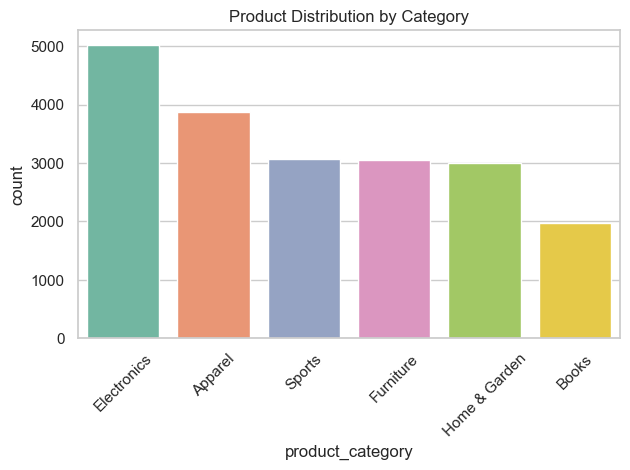

In [6]:
# STEP 5: Product Category Distribution
plt.figure(figsize=(7,4))
sns.countplot(x='product_category', data=df, palette='Set2', order=df['product_category'].value_counts().index)
plt.title('Product Distribution by Category')
plt.xticks(rotation=45)
plt.show()

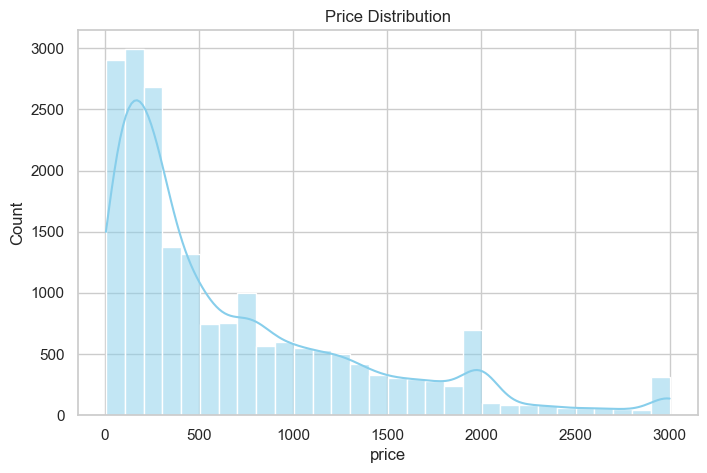

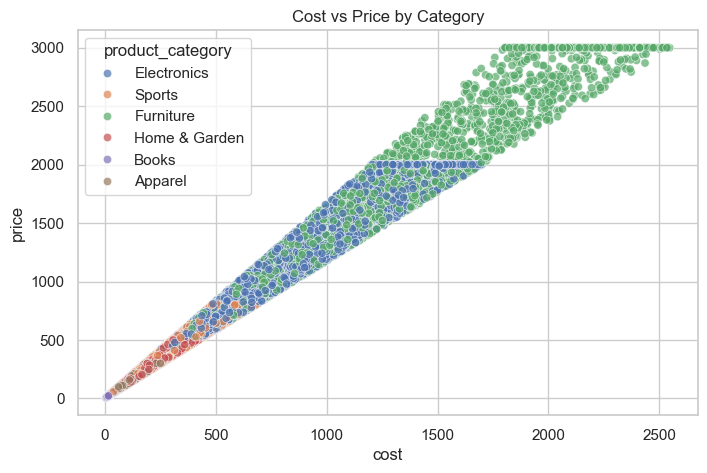

In [7]:
# STEP 6: Price & Cost Analysis
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30, kde=True, color='skyblue')
plt.title('Price Distribution')
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='cost', y='price', hue='product_category', data=df, alpha=0.7)
plt.title('Cost vs Price by Category')
plt.show()

C:\Users\akasar\AppData\Local\Temp\1\ipykernel_13904\3336101914.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='product_category', y='profit_margin', data=df, palette='coolwarm')


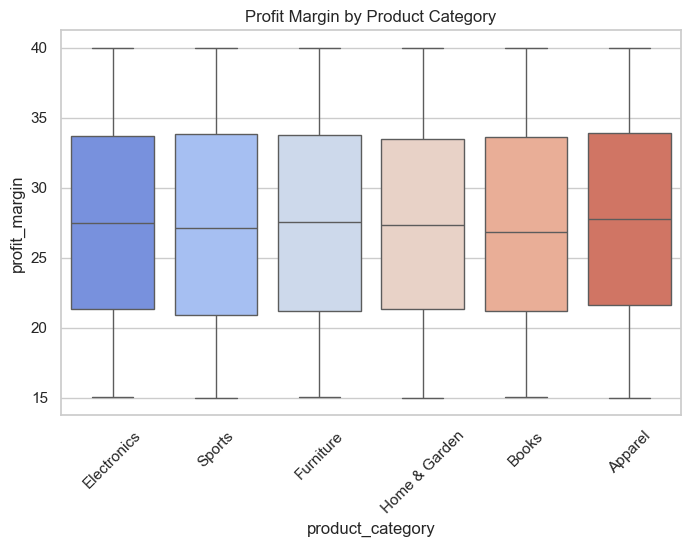

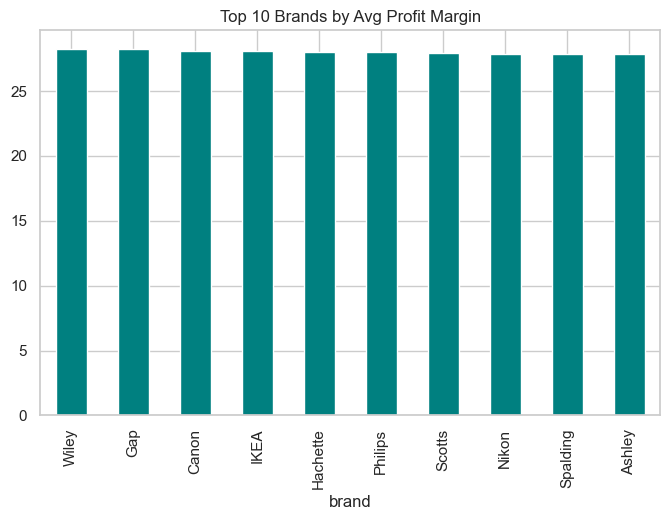

In [8]:
# STEP 7: Profit Margin & Brand Insights
plt.figure(figsize=(8,5))
sns.boxplot(x='product_category', y='profit_margin', data=df, palette='coolwarm')
plt.title('Profit Margin by Product Category')
plt.xticks(rotation=45)
plt.show()

top_brands = df.groupby('brand')['profit_margin'].mean().sort_values(ascending=False).head(10)
top_brands.plot(kind='bar', figsize=(8,5), color='teal')
plt.title('Top 10 Brands by Avg Profit Margin')
plt.show()

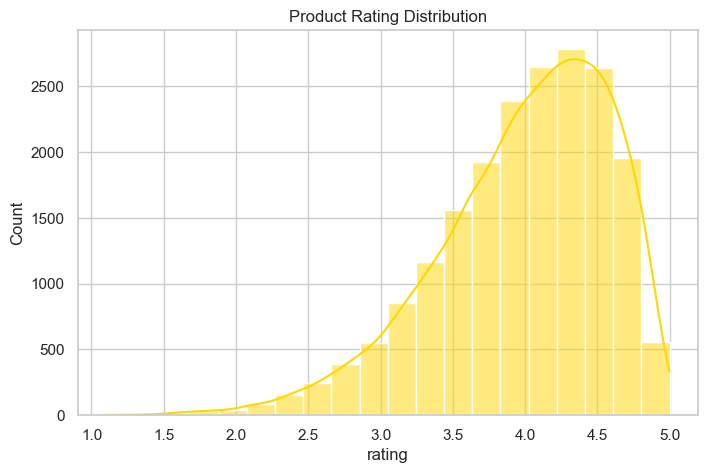

C:\Users\akasar\AppData\Local\Temp\1\ipykernel_13904\348567026.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='product_category', y='rating', data=df, palette='pastel')


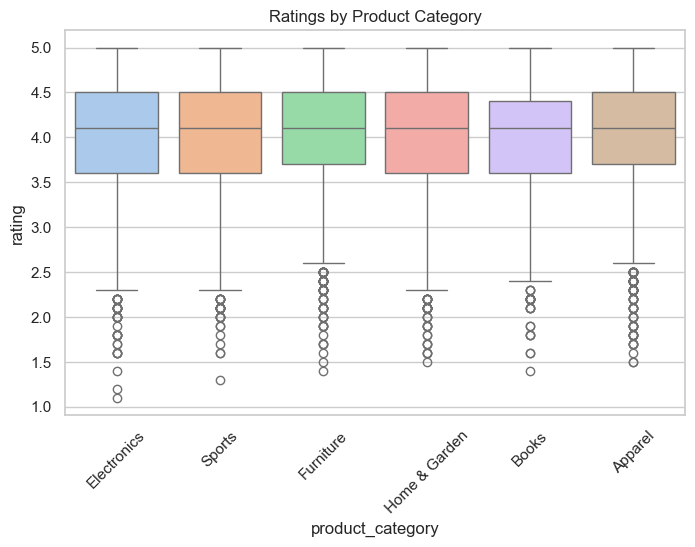

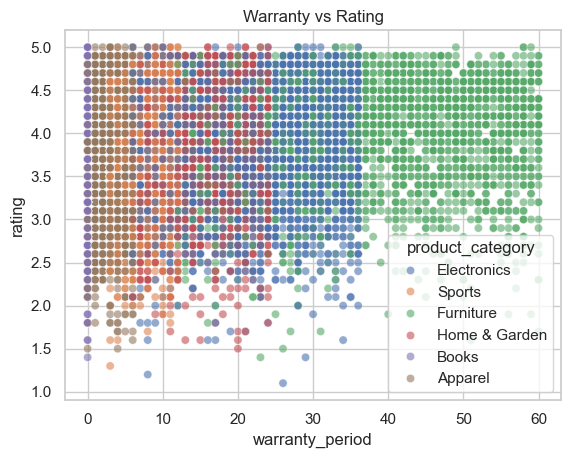

In [9]:
# STEP 8: Ratings & Warranty
plt.figure(figsize=(8,5))
sns.histplot(df['rating'], bins=20, kde=True, color='gold')
plt.title('Product Rating Distribution')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='product_category', y='rating', data=df, palette='pastel')
plt.title('Ratings by Product Category')
plt.xticks(rotation=45)
plt.show()

sns.scatterplot(x='warranty_period', y='rating', data=df, hue='product_category', alpha=0.6)
plt.title('Warranty vs Rating')
plt.show()

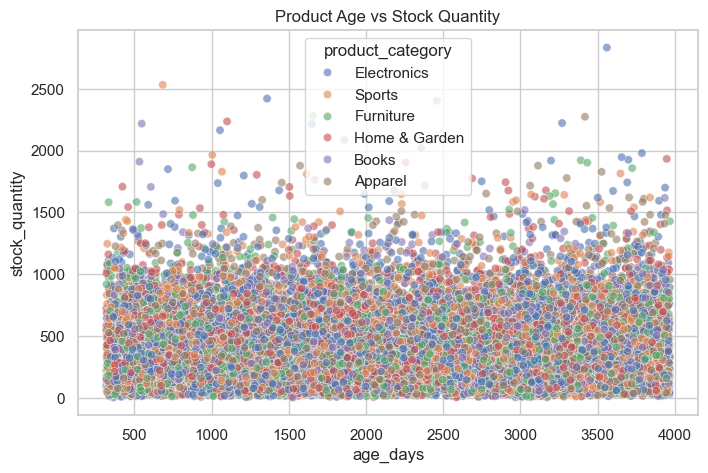

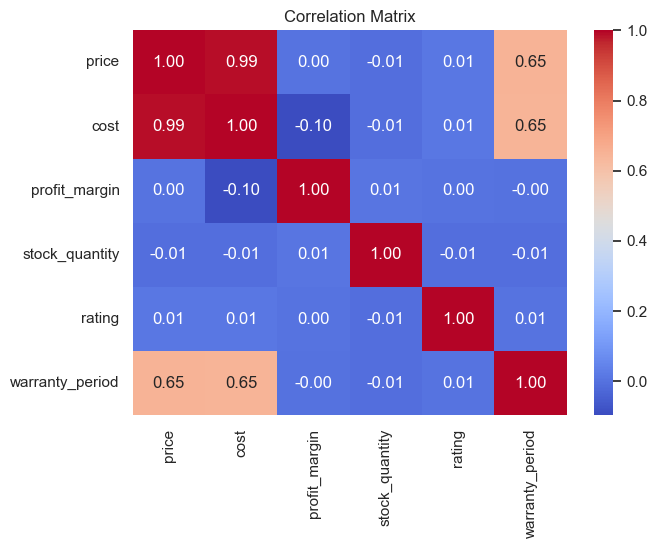

In [10]:
# STEP 9: Stock & Product Age
plt.figure(figsize=(8,5))
sns.scatterplot(x='age_days', y='stock_quantity', hue='product_category', data=df, alpha=0.6)
plt.title('Product Age vs Stock Quantity')
plt.show()

corr = df[['price','cost','profit_margin','stock_quantity','rating','warranty_period']].corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

C:\Users\akasar\AppData\Local\Temp\1\ipykernel_13904\3120854647.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='profit_segment', data=df, palette='crest')


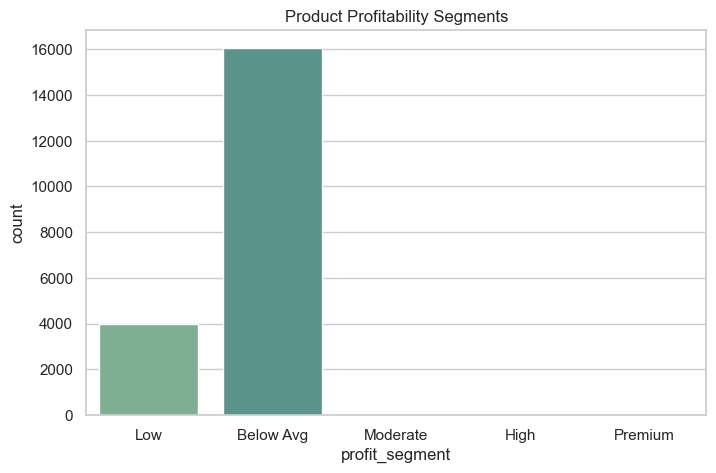

In [11]:
# STEP 10: Profitability Segmentation
bins = [0, 20, 40, 60, 80, 100]
labels = ['Low', 'Below Avg', 'Moderate', 'High', 'Premium']
df['profit_segment'] = pd.cut(df['profit_margin'], bins=bins, labels=labels, include_lowest=True)
plt.figure(figsize=(8,5))
sns.countplot(x='profit_segment', data=df, palette='crest')
plt.title('Product Profitability Segments')
plt.show()

In [12]:
# STEP 11: Key Insights
insights = [
    'Top 10 brands by profit margin identified — helps pricing strategy',
    'Warranty correlates positively with product rating in some categories',
    'Profit margins vary widely across categories — possible over/underpricing',
    'Older products tend to have higher stock — potential dead inventory',
    'Correlation analysis aids cross-functional optimization (cost, stock, profit)'
]
for i in insights:
    print('-', i)

- Top 10 brands by profit margin identified — helps pricing strategy
- Warranty correlates positively with product rating in some categories
- Profit margins vary widely across categories — possible over/underpricing
- Older products tend to have higher stock — potential dead inventory
- Correlation analysis aids cross-functional optimization (cost, stock, profit)


In [13]:
# Save processed output
df.to_csv('product_analysis_output.csv', index=False)